### <center>Dara Finas Elen</center>
#### <center>F1D022038</center>

# Here you can put your extraordinary code

In [427]:
## import foo as 
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
## ...

Code di atas digunakan untuk

memanggil fungsi pyplot library matplotlib dengan nama alias plt. Library ini digunakan untuk membaca gambar

memanggil library numpy dengan nama alias np. Library ini digunakan untuk membuat matriks

memanggil library cv2 dengan nama alias cv. Library ini digunakan untuk melakukan operasi dasar matriks

Code di bawah digunakan untuk

membaca gambar dengan plt.imread()

mengubah gambar menjadi grayscale dengan cv.cvtColor()

membuat plot gambar dan menampilkan gambar dalam satu plot

Text(0.5, 1.0, 'Gray Image')

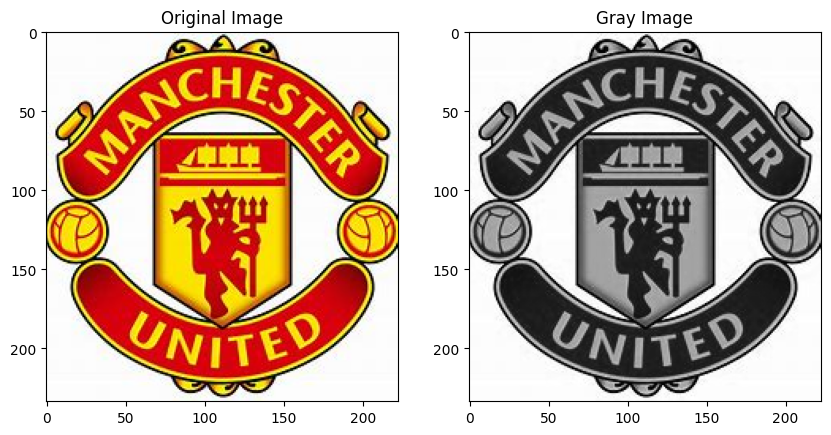

In [429]:
img = plt.imread('../assets/manchester_united.jpeg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(gray, cmap='gray')
ax[1].set_title('Gray Image')


In [430]:
print(img)

[[[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 ...

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]]


code di atas digunakan untuk menampilkan pixel dari gambar asli

In [431]:
print(gray)

[[253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 ...
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]]


Code di atas digunakan untuk menampilkan pixel dari gambar grayscale

## 1. Perbaiki Kualitas Citra Gambar ##


In [432]:
kernelm_3 = np.full((3,3), 1/9)
kernelm_9 = np.full((9,9), 1/81)

code di atas digunakan untuk membuat kernel full satu angka yang akan digunakan di dalam proses filtrasi menggunakan fungsi full. pada fungsi full akan menggunakan parameter berapa matriks kernelnya dan bilangan yang akan mengisinya

In [433]:
def filter(gambar, kernel):
    tinggiGambar, lebarGambar = gambar.shape
    tinggiKernel, lebarKernel = kernel.shape

    tinggiCenter = int((tinggiKernel-1)/2)
    lebarCenter = int ((lebarKernel-1)/2)

    paddingKiri = lebarCenter
    paddingKanan = lebarKernel - lebarCenter
    paddingAtas = tinggiCenter
    paddingBawah = tinggiKernel - tinggiCenter
    gambar = np.pad(gambar, ((paddingKiri, paddingKanan), (paddingAtas, paddingBawah)), mode='edge')

    hasil = np.zeros([tinggiGambar, lebarGambar])
    for i in range(tinggiGambar):
        for j in range(lebarGambar):
            helper = 0
            for k in range(tinggiKernel):
                for l in range(lebarKernel):
                    helper += gambar[i+k, j+1]*kernel[k,1]
            hasil[i,j] = helper
    return hasil

code di atas digunakan untuk memfiltrasi dengan mean filtering. Pada fungsi ini akan langsung otomatis menambahkan padding ke dalam citra untuk membantu proses konvolusi yang akan berjalan untuk proses mencari mean dari piksel-piksel sesuai kernel yang akan digunakan. Yang membedakan mean filtering  dengan konvolusi biasa adalah kernel yang akan dipakai


In [434]:
def median(arr):
    n = len(arr)
    sorted_arr = sorted(arr)
    if n % 2 == 0:
        median1 = sorted_arr[n//2]
        median2 = sorted_arr[n//2-1]
        median = (median1 + median2)/2
    else:
        median = sorted_arr[n//2]
    
    return median

code di atas digunakan untuk mencari nilai tengah pada citra yang telah dibagi oleh kernel. Sebelum mencari nilai tengah, diperlukan fungsi sorted untuk mengurutkan data pada array yang akan dipakai

In [435]:
def filterMedian(gambar, kernel):
    tinggiGambar, lebarGambar = gambar.shape
    tinggiKernel, lebarKernel = kernel.shape

    tinggiCenter = int((tinggiKernel - 1)/2)
    lebarCenter = int((lebarKernel - 1)/2)

    paddingKiri = lebarCenter
    paddingKanan = lebarKernel - lebarCenter
    paddingAtas = tinggiCenter
    paddingBawah = tinggiKernel - tinggiCenter
    gambar = np.pad(gambar, ((paddingKiri, paddingKanan), (paddingAtas, paddingBawah)), mode='edge')

    hasil = np.zeros([tinggiGambar, lebarGambar])
    for i in range(tinggiGambar):
        for j in range(lebarGambar):
            temp = np.zeros(len(kernel)*len(kernel))
            indeks = 0
            for k in range(tinggiKernel):
                for l in range(lebarKernel):
                    temp[indeks] += gambar[i+k, j+l]
                    indeks +=1
                    hasil[i,j] = median(temp)
    return hasil

code diatas akan langsung otomatis menambahkan padding ke dalam citra untuk membantu proses konvolusi yang akan berjalan untuk proses peletakan median dari data yang diambil dari piksel-piksel sesuai kernel yang akan digunakan. Untuk proses pencarian median dilakukan dengan memanggil fungsi median() pada fungsi ini

In [436]:
def modus(arr):
    count = {}
    for num in arr:
        if num in count:
            count[num] += 1
        else:
            count[num] = 1
    
    max_count = 0
    modus = None
    for num in count:
        if count[num] > max_count:
            max_count = count[num]
            modus = num
    return modus

code di atas digunakan untuk mencari nilai modus pada data array. Pencarian dilakukan dengan memanfaatkan looping yang akan terus menambah angka pada variabel count jika data array memiliki nilai piksel yang sama

In [437]:
def filterModus(gambar, kernel):
    tinggiGambar, lebarGambar = gambar.shape
    tinggiKernel, lebarKernel = kernel.shape

    tinggiCenter = int((tinggiKernel - 1)/2)
    lebarCenter = int((lebarKernel - 1)/2)

    paddingKiri = lebarCenter
    paddingKanan = lebarKernel - lebarCenter
    paddingAtas = tinggiCenter
    paddingBawah = tinggiKernel - tinggiCenter
    gambar = np.pad(gambar, ((paddingKiri, paddingKanan), (paddingAtas, paddingBawah)), mode='edge')

    hasil = np.zeros([tinggiGambar, lebarGambar])
    for i in range(tinggiGambar):
        for j in range(lebarGambar):
            temp = np.zeros(len(kernel)*len(kernel))
            indeks = 0
            for k in range(tinggiKernel):
                for l in range(lebarKernel):
                    temp[indeks] += gambar[i+k, j+l]
                    indeks +=1
                    hasil[i,j] = modus(temp)
    return hasil

code diatas akan langsung otomatis menambahkan padding ke dalam citra untuk membantu proses konvolusi yang akan berjalan untuk proses peletakan modus dari data yang diambil dari piksel-piksel sesuai kernel yang akan digunakan. Untuk proses pencarian median dilakukan dengan memanggil fungsi modus() pada fungsi ini

In [438]:
kernel1 = np.array([[1/10, 1/10, 1/10],
                    [1/10, 1/5, 1/10],
                    [1/10, 1/10, 1/10]])

kernel2 = np.array([[1/9, 1/9, 1/9],
                    [1/9, 8/9, 1/9],
                    [1/9, 1/9, 1/9]])

code digunakan untuk mendeklarasikan kernel yang akan digunakan untuk proses sharpening dan smoothing

In [439]:
def smoothing(gambar, kernel):
    tinggiGambar, lebarGambar = gambar.shape
    tinggiKernel, lebarKernel = kernel.shape

    tinggiCenter = int((tinggiKernel-1)/2)
    lebarCenter = int ((lebarKernel-1)/2)

    paddingKiri = lebarCenter
    paddingKanan = lebarKernel - lebarCenter
    paddingAtas = tinggiCenter
    paddingBawah = tinggiKernel - tinggiCenter
    gambar = np.pad(gambar, ((paddingKiri, paddingKanan), (paddingAtas, paddingBawah)), mode='edge')

    hasil = np.zeros([tinggiGambar, lebarGambar])
    for i in range(tinggiGambar):
        for j in range(lebarGambar):
            helper = 0
            for k in range(tinggiKernel):
                for l in range(lebarKernel):
                    helper += gambar[i+k, j+1]
            hasil[i,j] = helper/(tinggiKernel*lebarKernel)
    return hasil

code diatas akan langsung otomatis menambahkan padding ke dalam citra untuk membantu proses konvolusi yang akan berjalan untuk proses peletakan dari data yang diambil dari piksel-piksel sesuai kernel yang akan digunakan. Untuk proses pencarian nilai smoothing dilakukan dengan menjumlahkan nilai piksel disekitar dan membaginya dengan jumlah piksel kernel

In [440]:
def sharpening(gambar, kernel):
    tinggiGambar, lebarGambar = gambar.shape
    tinggiKernel, lebarKernel = kernel.shape

    tinggiCenter = int((tinggiKernel-1)/2)
    lebarCenter = int ((lebarKernel-1)/2)

    paddingKiri = lebarCenter
    paddingKanan = lebarKernel - lebarCenter
    paddingAtas = tinggiCenter
    paddingBawah = tinggiKernel - tinggiCenter
    gambar = np.pad(gambar, ((paddingKiri, paddingKanan), (paddingAtas, paddingBawah)), mode='edge')

    hasil = np.zeros([tinggiGambar, lebarGambar])
    for i in range(tinggiGambar):
        for j in range(lebarGambar):
            helper = 0
            for k in range(tinggiKernel):
                for l in range(lebarKernel):
                    helper += (gambar[i+k, j+1]*kernel[k,l])
            hasil[i,j] = helper
    return hasil

code diatas akan langsung otomatis menambahkan padding ke dalam citra untuk membantu proses konvolusi yang akan berjalan untuk proses peletakan dari data yang diambil dari piksel-piksel sesuai kernel yang akan digunakan. Untuk proses pencarian nilai sharpening dilakukan dengan menjumlahkan hasil perkalian antara nilai piksel dan nilai kernel disekitarnya

In [441]:
mean_3 = filter(gray, kernelm_3)
mean_9 = filter(gray, kernelm_9)

code di atas untuk mendeklarasikan variabel mean_3 dan mean_9 kemudian langsung diisi dengan fungsi filter dengan parameter gray (gambar grayscale) dan kernel masing-masing sesuai matriksnya

In [442]:
median_3 = filterMedian(gray, kernelm_3)
median_9 = filterMedian(gray, kernelm_9)

code di atas untuk mendeklarasikan variabel median_3 dan median_9 kemudian langsung diisi dengan fungsi filterMedian dengan parameter gray (gambar grayscale) dan kernel masing-masing sesuai matriksnya

In [443]:
modus_3 = filterModus(gray, kernelm_3)
modus_9  = filterModus(gray, kernelm_9)

code di atas untuk mendeklarasikan variabel modus_3 dan modus_9 kemudian langsung diisi dengan fungsi filterModus dengan parameter gray (gambar grayscale) dan kernel masing-masing sesuai matriksnya

code di bawah digunakan untuk mendeklarasikan variabel sharpeningVar, smoothingVar, shar, dan smoo kemudian langsung diisi dengan fungsi sharpering atau smoothing sesuai kebutuhan dengan parameter gray (gambar grayscale) dan kernel masing-masing sesuai matriksnya

Kemudian menampilkan hasil gambarnya

Text(0.5, 1.0, 'smoothing pake kernel2')

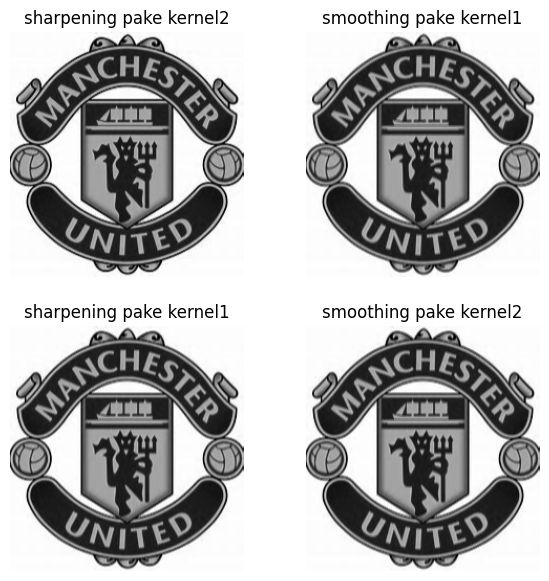

In [444]:
sharpeningVar = sharpening(gray, kernel2)
smoothingVar = smoothing(gray, kernel1)
shar = sharpening(gray, kernel1)
smoo = smoothing(gray, kernel2)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
for row in ax:
    for col in row:
        col.axis('off')
        col.grid(False)

ax[0][0].imshow(sharpeningVar, cmap='gray')
ax[0][0].set_title('sharpening pake kernel2')
ax[0][1].imshow(smoothingVar, cmap='gray')
ax[0][1].set_title('smoothing pake kernel1')
ax[1][0].imshow(shar, cmap='gray')
ax[1][0].set_title('sharpening pake kernel1')
ax[1][1].imshow(smoo, cmap='gray')
ax[1][1].set_title('smoothing pake kernel2')

code di bawah adalah untuk menampilkan gambar dari proses mean hingga smoothing

Text(0.5, 1.0, 'Median 9x9')

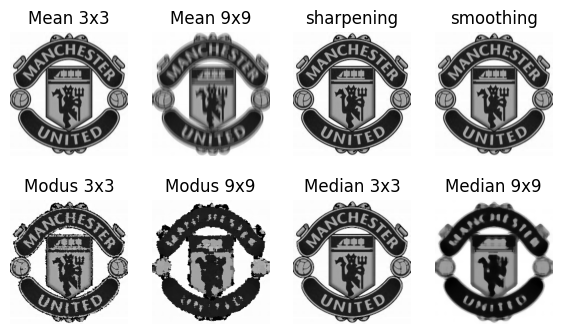

In [445]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(7, 4))
for row in ax:
    for col in row:
        col.axis('off')
        col.grid(False)

ax[0][0].imshow(mean_3, cmap='gray')
ax[0][0].set_title('Mean 3x3')
ax[0][1].imshow(mean_9, cmap='gray')
ax[0][1].set_title('Mean 9x9')
ax[0][2].imshow(sharpeningVar, cmap='gray')
ax[0][2].set_title('sharpening')
ax[0][3].imshow(smoothingVar, cmap='gray')
ax[0][3].set_title('smoothing')
ax[1][0].imshow(modus_3, cmap='gray')
ax[1][0].set_title('Modus 3x3')
ax[1][1].imshow(modus_9, cmap='gray')
ax[1][1].set_title('Modus 9x9')
ax[1][2].imshow(median_3, cmap='gray')
ax[1][2].set_title('Median 3x3')
ax[1][3].imshow(median_9, cmap='gray')
ax[1][3].set_title('Median 9x9')



## 2. Deteksi Tepi ##

In [446]:
def padding(gambar, kernel):
    if len(kernel)%2 == 0:
        n = int(len(kernel)/2)
        hasil = np.pad(gambar, ([0,n], [0,n]))
    else:
        n = int((len(kernel)-1)/2)
        hasil = np.pad(gambar, ([n,n], [n,n]))
    return hasil

code di atas digunakan untuk menciptakan suatu citra baru yang telah di zero padding sesuai kernel yang dibutuhkan, oleh karena itu fungsi ini membutuhkan parameter gambar untuk citranya dan kernel untuk ukuran paddingnya, pading dilakukan berdasarkan ukuran kernel, jika kernel berukuran ganjil maka jumlah padding yang didapatkan berasal dari panjang kernel yang dikurangi 1 lalu dibagi 2 sedangkan untuk kernel genap didapatkan dari ukuran kernel yang dibagi 2

In [447]:
def konvolusi(pad, gambar, kernel):
    hasil = np.zeros(gambar.shape).astype(int)
    for i in range(gambar.shape[0]):
        for j in range(gambar.shape[1]):

            for k in range(len(kernel)):
                for l in range(len(kernel)):
                    hasil[i,j] += pad[i+k, j+l] * kernel[k][l]
    return hasil

code di atas digunakan untuk melakukan konvolusi pada citra yang telah dipadding lalu menyimpannya kembali pada variabel yang berukuran sama dengan citra aslinya yang dalam kasus ini adalah variabel 'hasil', adapun proses konvolusi citra menyesuaikan dengan ukuran kernel. Sehingga dibutuhkan 3 parameter dalam fungsi ini, yaitu pad (citra yang telah dipadding, nantinya akan diambil nilai-nilainya untuk dilakukan konvolusi), gambar (digunakan untuk mengambil ukuran citra asli untuk ditempatkan pada variabel hasil) dan kernel digunakan untuk membantu proses konvolusi yang dimana dilakukan proses SOP pada piksel yang ingin di konvolusi serta piksel tetangganya dengan kernel yang ada pada parameter

In [448]:
def deteksi_tepi(gambar, kernel1, kernel2):
    paddingGambar = padding(gambar, kernel1)

    konv1 = konvolusi(paddingGambar, gambar, kernel1)
    konv2 = konvolusi(paddingGambar, gambar, kernel2)

    square1 = konv1 * konv1
    square2 = konv2 * konv2

    Gradient_Y = np.zeros(square1.shape).astype(int)
    Gradient_Y = np.sqrt(square1)
    
    Gradient_X = np.zeros(square2.shape).astype(int)
    Gradient_X = np.sqrt(square2)

    jumlah = square1 + square2
    hasil = np.sqrt(jumlah)


    return hasil, Gradient_X, Gradient_Y



code di atas digunakan untuk melakukan pendektesian  tepi, pada fungsi tersebut akan mengembalikan 3 nilai yaitu hasil pendektesian tepi serta hasil pendektesian tepi pada gradient X dan Y (sebagai percobaan).

Hal pertama yang dilakukan untuk pendektesian adalah melakukan konvolusi citra dengan kernel yang berupa operator pendektesian tepi, pada kasus ini terdapat 2 kernel (untuk gradient X dan Y) pada setiap metode sehingga dilakukan 2 konvolusi pada masing-masing operator, lalu hasil kedua konvolusi tersebut dipangkatkan dan diakarkan dengan bantuan np.sqrt(), jika ingin mendapatkan hasil pendektesian tepi yang lengkap kedua hasil konvolusi tadi ditambahkan setelah dipangkatkan

# Sobel

In [449]:
# kernel sobel
Sx = [[-1, 0, 1],
      [-2, 0, 2],
      [-1, 0, 1]]
Sy = [[ 1, 2, 1],
      [ 0, 0, 0],
      [-1,-2,-1]]

code di atas adalah kernel yang dibutuhkan untuk menjalankan operator sobel

code di bawah digunakan untuk menampilkan hasil sobel, serta hasil gradienx dan y dengan gambar grascale

Text(0.5, 1.0, 'Hasil Sobel')

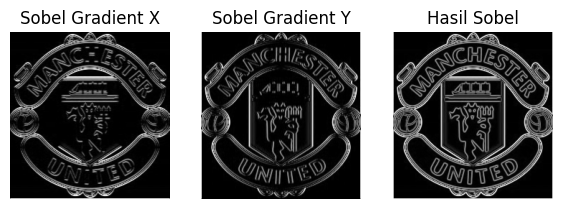

In [477]:
sobel_img, sobel_imgX, sobel_imgY = deteksi_tepi(gray, Sx, Sy)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(7, 4))
for a in ax:
    a.axis('off')

ax[0].imshow(sobel_imgX, cmap='gray')
ax[0].set_title('Sobel Gradient X')
ax[1].imshow(sobel_imgY, cmap='gray')
ax[1].set_title('Sobel Gradient Y')
ax[2].imshow(sobel_img, cmap='gray')
ax[2].set_title('Hasil Sobel')

In [467]:
sobelMean3x3,_,_= deteksi_tepi(mean_3, Sx, Sy) 
sobelMean9x9,_,_= deteksi_tepi(mean_9, Sx, Sy)
sobelSharpening,_,_= deteksi_tepi(sharpeningVar, Sx, Sy)
sobelSmoothing,_,_= deteksi_tepi(smoothingVar, Sx, Sy)
sobelModus3x3,_,_ = deteksi_tepi(modus_3, Sx, Sy)
sobelModus9x9,_,_ = deteksi_tepi(modus_9, Sx, Sy)
sobelMedian3x3,_,_ = deteksi_tepi(median_3, Sx, Sy)
sobelMedian9x9,_,_ = deteksi_tepi(median_9, Sx, Sy)

code di atas adalah pendeklarasian variabel yang akan digunakan untuk menampilkan hasil proses yang diinginkan dalah hal ini hasil sobel dari mean, median, modul, sharpening dan smoothing yang telah dilakukan sebelumnya

code di bawah digunakan untuk menampilkan proses hasil sobel dari mean, median, modus, sharpening dam smoothing

Text(0.5, 1.0, 'Sobel Median 9x9')

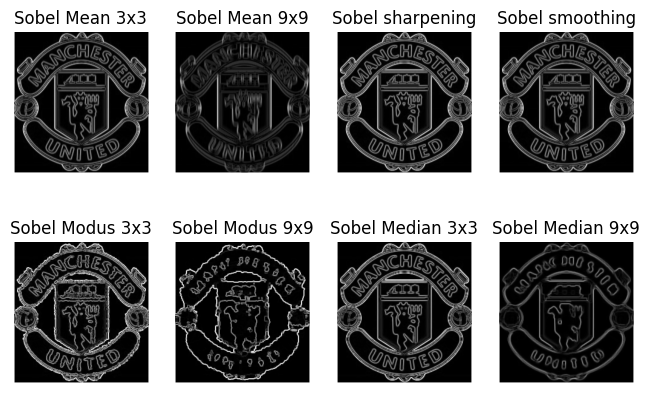

In [470]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(8, 5))
for row in ax:
    for col in row:
        col.axis('off')
        col.grid(False)

ax[0][0].imshow(sobelMean3x3, cmap='gray')
ax[0][0].set_title('Sobel Mean 3x3')
ax[0][1].imshow(sobelMean9x9, cmap='gray')
ax[0][1].set_title('Sobel Mean 9x9')
ax[0][2].imshow(sobelSharpening, cmap='gray')
ax[0][2].set_title('Sobel sharpening')
ax[0][3].imshow(sobelSmoothing, cmap='gray')
ax[0][3].set_title('Sobel smoothing')
ax[1][0].imshow(sobelModus3x3, cmap='gray')
ax[1][0].set_title('Sobel Modus 3x3')
ax[1][1].imshow(sobelModus9x9, cmap='gray')
ax[1][1].set_title('Sobel Modus 9x9')
ax[1][2].imshow(sobelMedian3x3, cmap='gray')
ax[1][2].set_title('Sobel Median 3x3')
ax[1][3].imshow(sobelMedian9x9, cmap='gray')
ax[1][3].set_title('Sobel Median 9x9')

# Prewitt

In [451]:
#Kernel Prewitt
Px = [[-1, 0, 1],
      [-1, 0, 1],
      [-1, 0, 1]]
Py = [[ 1, 1, 1],
      [ 0, 0, 0],
      [-1,-1,-1]]

code di atas adalah kernel yang dibutuhkan untuk menjalankan operator prewitt

code di bawah digunakan untuk menampilkan hasil prewitt, serta hasil gradienx dan y dengan gambar grascale

Text(0.5, 1.0, 'Hasil Prewitt')

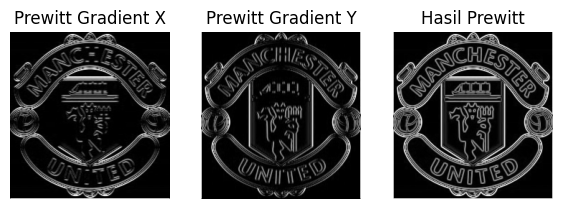

In [452]:
prewitt_img, prewitt_imgX, prewitt_imgY = deteksi_tepi(gray, Px, Py)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(7, 4))
for a in ax:
    a.axis('off')

ax[0].imshow(prewitt_imgX, cmap='gray')
ax[0].set_title('Prewitt Gradient X')
ax[1].imshow(prewitt_imgY, cmap='gray')
ax[1].set_title('Prewitt Gradient Y')
ax[2].imshow(prewitt_img, cmap='gray')
ax[2].set_title('Hasil Prewitt')

In [471]:
prewittMean3x3,_,_= deteksi_tepi(mean_3, Px, Py) 
prewittMean9x9,_,_= deteksi_tepi(mean_9, Px, Py)
prewittSharpening,_,_= deteksi_tepi(sharpeningVar, Px, Py)
prewittSmoothing,_,_= deteksi_tepi(smoothingVar, Px, Py)
prewittModus3x3,_,_ = deteksi_tepi(modus_3, Px, Py)
prewittModus9x9,_,_ = deteksi_tepi(modus_9, Px, Py)
prewittMedian3x3,_,_ = deteksi_tepi(median_3, Px, Py)
prewittMedian9x9,_,_ = deteksi_tepi(median_9, Px, Py)

code di atas adalah pendeklarasian variabel yang akan digunakan untuk menampilkan hasil proses yang diinginkan dalah hal ini hasil prewitt dari mean, median, modul, sharpening dan smoothing yang telah dilakukan sebelumnya

code di bawah digunakan untuk menampilkan proses hasil prewitt dari mean, median, modus, sharpening dam smoothing

Text(0.5, 1.0, 'Prewitt Median 9x9')

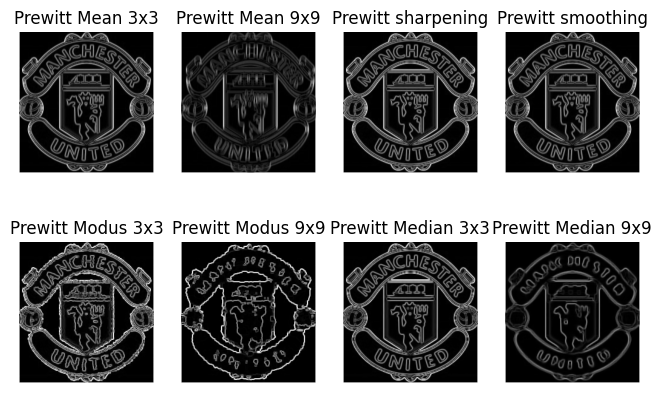

In [472]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(8, 5))
for row in ax:
    for col in row:
        col.axis('off')
        col.grid(False)

ax[0][0].imshow(prewittMean3x3, cmap='gray')
ax[0][0].set_title('Prewitt Mean 3x3')
ax[0][1].imshow(prewittMean9x9, cmap='gray')
ax[0][1].set_title('Prewitt Mean 9x9')
ax[0][2].imshow(prewittSharpening, cmap='gray')
ax[0][2].set_title('Prewitt sharpening')
ax[0][3].imshow(prewittSmoothing, cmap='gray')
ax[0][3].set_title('Prewitt smoothing')
ax[1][0].imshow(prewittModus3x3, cmap='gray')
ax[1][0].set_title('Prewitt Modus 3x3')
ax[1][1].imshow(prewittModus9x9, cmap='gray')
ax[1][1].set_title('Prewitt Modus 9x9')
ax[1][2].imshow(prewittMedian3x3, cmap='gray')
ax[1][2].set_title('Prewitt Median 3x3')
ax[1][3].imshow(prewittMedian9x9, cmap='gray')
ax[1][3].set_title('Prewitt Median 9x9')

# Roberts

In [453]:
#Kernel Roberts
Rp = [[ 1, 0],
      [ 0,-1]]
Rm = [[ 0, 1],
      [-1, 0]]

code di atas adalah kernel yang dibutuhkan untuk menjalankan operator roberts

code di bawah digunakan untuk menampilkan hasil roberts, serta hasil gradienx dan y dengan gambar grascale

Text(0.5, 1.0, 'Hasil Roberts')

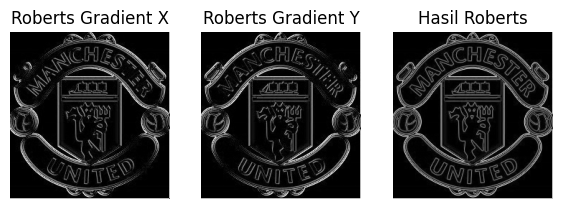

In [454]:
roberts_img, roberts_imgX, roberts_imgY = deteksi_tepi(gray, Rp, Rm)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(7, 4))
for a in ax:
    a.axis('off')

ax[0].imshow(roberts_imgX, cmap='gray')
ax[0].set_title('Roberts Gradient X')
ax[1].imshow(roberts_imgY, cmap='gray')
ax[1].set_title('Roberts Gradient Y')
ax[2].imshow(roberts_img, cmap='gray')
ax[2].set_title('Hasil Roberts')

In [473]:
robertsMean3x3,_,_= deteksi_tepi(mean_3, Rp, Rm) 
robertsMean9x9,_,_= deteksi_tepi(mean_9, Rp, Rm)
robertsSharpening,_,_= deteksi_tepi(sharpeningVar, Rp, Rm)
robertsSmoothing,_,_= deteksi_tepi(smoothingVar, Rp, Rm)
robertsModus3x3,_,_ = deteksi_tepi(modus_3, Rp, Rm)
robertsModus9x9,_,_ = deteksi_tepi(modus_9, Rp, Rm)
robertsMedian3x3,_,_ = deteksi_tepi(median_3, Rp, Rm)
robertsMedian9x9,_,_ = deteksi_tepi(median_9, Rp, Rm)

code di atas adalah pendeklarasian variabel yang akan digunakan untuk menampilkan hasil proses yang diinginkan dalah hal ini hasil roberts dari mean, median, modul, sharpening dan smoothing yang telah dilakukan sebelumnya

code di bawah digunakan untuk menampilkan proses hasil roberts dari mean, median, modus, sharpening dam smoothing

Text(0.5, 1.0, 'Roberts Median 9x9')

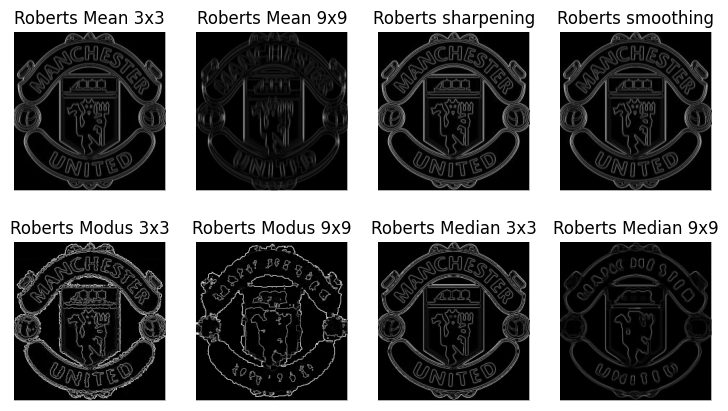

In [475]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(9, 5))
for row in ax:
    for col in row:
        col.axis('off')
        col.grid(False)

ax[0][0].imshow(robertsMean3x3, cmap='gray')
ax[0][0].set_title('Roberts Mean 3x3')
ax[0][1].imshow(robertsMean9x9, cmap='gray')
ax[0][1].set_title('Roberts Mean 9x9')
ax[0][2].imshow(robertsSharpening, cmap='gray')
ax[0][2].set_title('Roberts sharpening')
ax[0][3].imshow(robertsSmoothing, cmap='gray')
ax[0][3].set_title('Roberts smoothing')
ax[1][0].imshow(robertsModus3x3, cmap='gray')
ax[1][0].set_title('Roberts Modus 3x3')
ax[1][1].imshow(robertsModus9x9, cmap='gray')
ax[1][1].set_title('Roberts Modus 9x9')
ax[1][2].imshow(robertsMedian3x3, cmap='gray')
ax[1][2].set_title('Roberts Median 3x3')
ax[1][3].imshow(robertsMedian9x9, cmap='gray')
ax[1][3].set_title('Roberts Median 9x9')